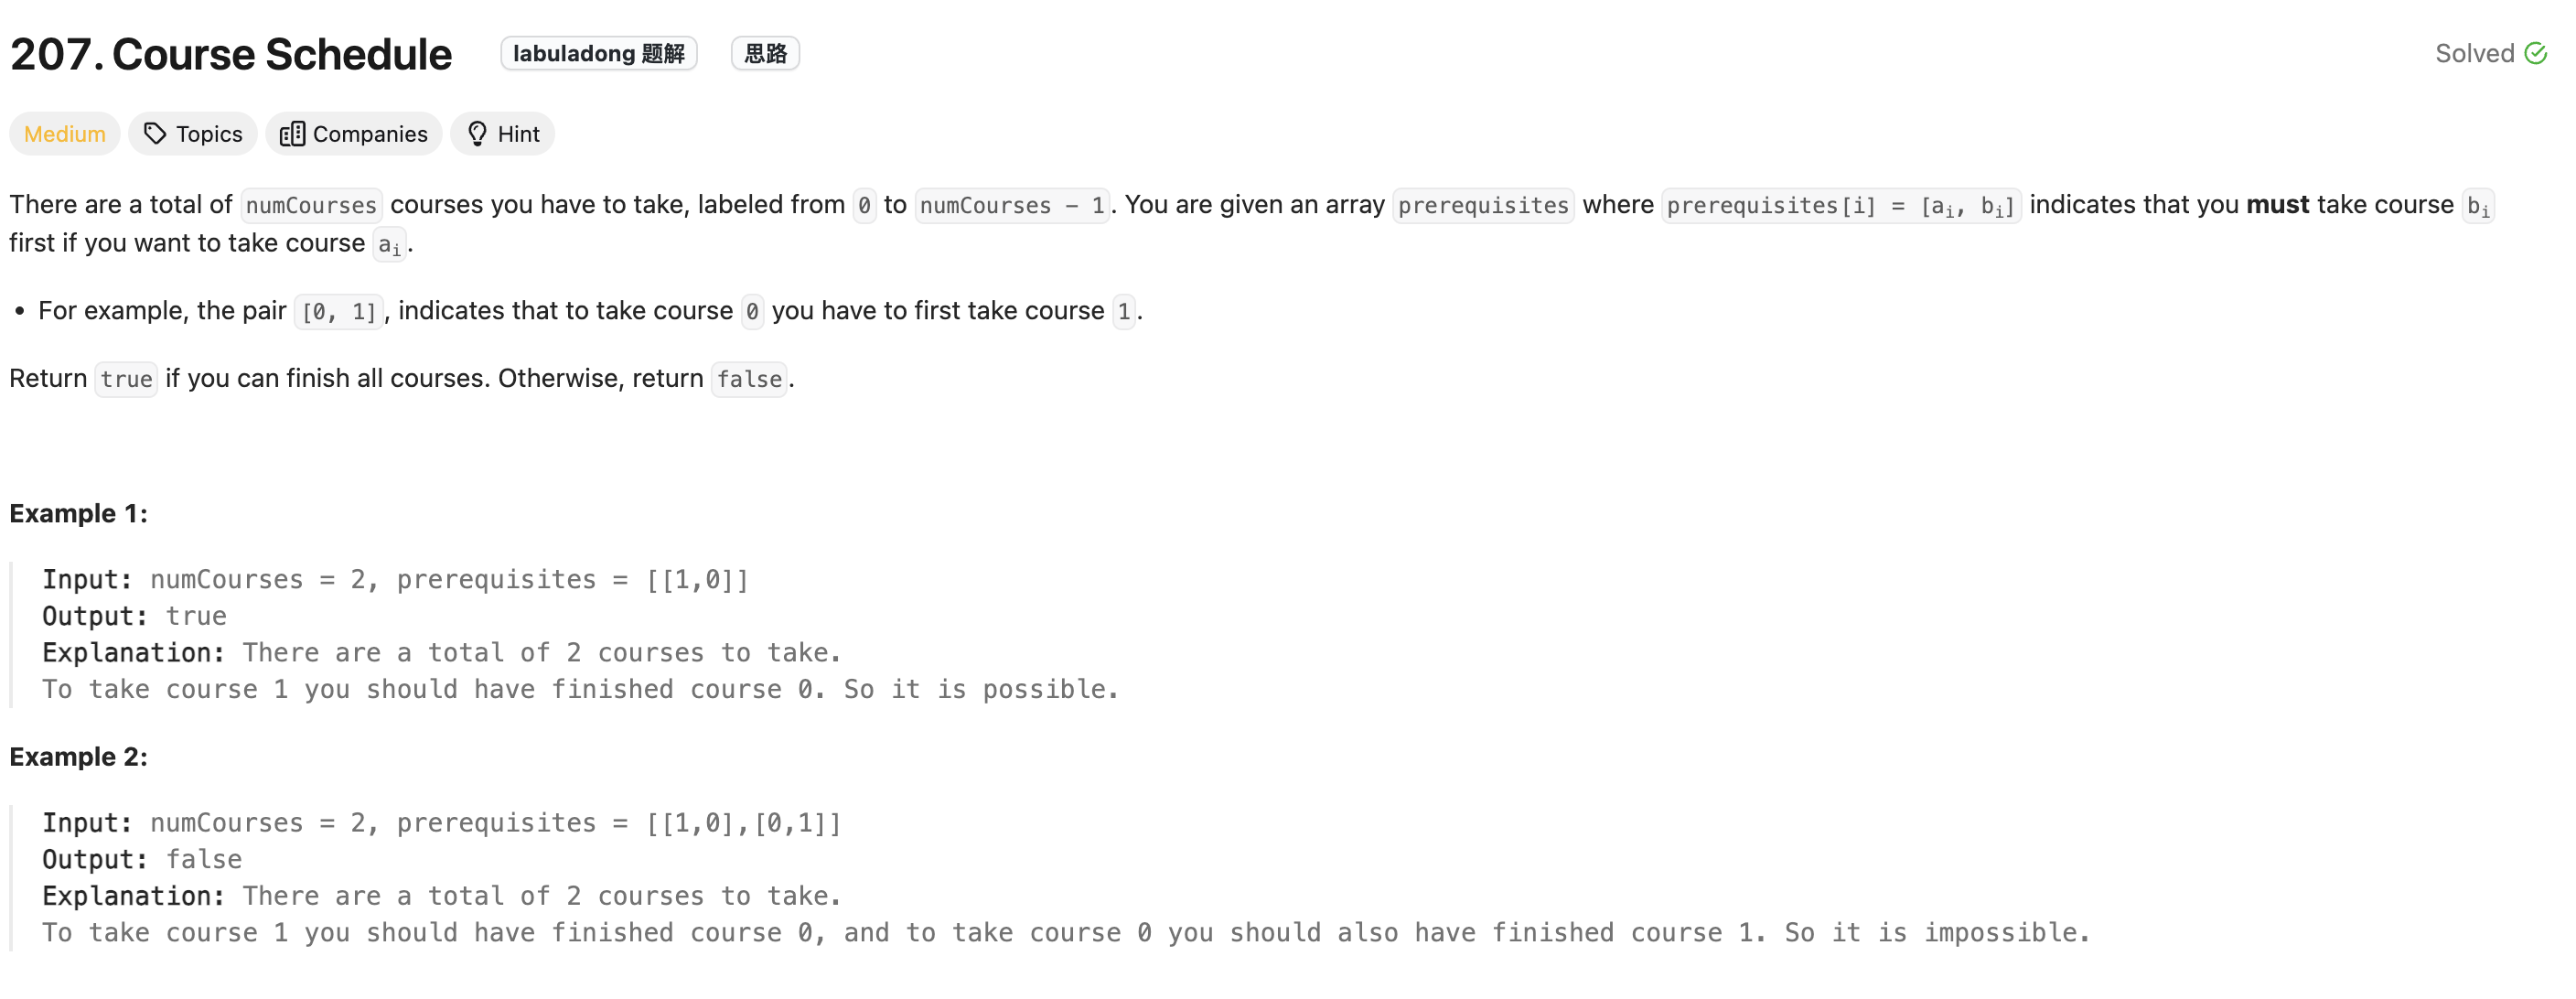

## DFS Solution

In [ ]:
class Solution:
    def __init__(self):
        self.onPath = []
        self.visited = []
        self.hasCycle = False

    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        graph = self.buildgraph(numCourses, prerequisites)
        self.onPath = [False] * numCourses
        self.visited = [False] * numCourses
        for i in range(numCourses):
            self.traverse(graph, i)
        return not self.hasCycle
    
    # Build adjacency list
    def buildgraph(self, numCourses: int, prerequisites: List[List[int]]):
        
        graph = [[] for i in range(numCourses)]

        for course, requirement in prerequisites:
            #记录是否有邻居节点
            graph[course].append(requirement)
        return graph
    
    # 图遍历函数，遍历所有路径
    def traverse(self, graph: List[List[int]], s: int):
        if self.hasCycle:
            # 如果已经找到了环，也不用再遍历了
            return

        if self.visited[s]:
            # 不用再重复遍历已遍历过的节点
            return
        
        if self.onPath[s]:
            # s 已经在递归路径上，说明成环了
            self.hasCycle = True
            return
        
        # 前序代码位置
        # Add current element to path
        self.onPath[s] = True
        for neighbor in graph[s]:
            self.traverse(graph, neighbor)

        # 后序代码位置
        #with draw the element on path
        self.onPath[s] = False
        #marked the node as visieted so we can get rid of 冗余计算
        self.visited[s] = True

## BFS Solution

In [ ]:
import collections

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # Step 1: Build the graph using adjacency lists
        graph = self.buildgraph(numCourses, prerequisites)

        # Step 2: Initialize an array to track the in-degree of each node
        # (the number of prerequisites required for each course)
        indegree = [0] * numCourses
        for course, requirement in prerequisites:
            indegree[course] += 1

        # Step 3: Initialize a queue with all nodes that have zero in-degree
        # (courses with no prerequisites)
        q = collections.deque()
        for i in range(numCourses):
            if indegree[i] == 0:
                q.append(i)

        # Step 4: Perform topological sorting
        count = 0  # To track the number of courses we can complete
        while q:
            # Remove a course with zero in-degree from the queue
            cur = q.popleft()
            count += 1  # Mark this course as completed

            # For each neighbor (course that depends on the current course)
            neighbors = graph[cur]
            for neighbor in neighbors:
                # Decrement the in-degree of the neighbor
                indegree[neighbor] -= 1
                # If the neighbor now has zero in-degree, add it to the queue
                if indegree[neighbor] == 0:
                    q.append(neighbor)

        # If we were able to complete all courses, return True (no cycle detected)
        return count == numCourses

    # Helper function to build the graph
    # We need the graph to reflect how prerequisites influence other courses 
    # (i.e., which courses are unlocked after a prerequisite is completed).
    def buildgraph(self, numCourses: int, prerequisites: List[List[int]]):
        # Initialize an adjacency list for the graph
        graph = [[] for _ in range(numCourses)]

        
        # Fill the adjacency list with the prerequisites data
        for course, requirement in prerequisites:
            # Add the prerequisite course to the current course's list
            graph[requirement].append(course)

        return graph
